In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline  

In [21]:
google = yf.Ticker('GOOGL')
hist = google.history(period="max")
name = 'Google'

In [26]:
open_p = hist['Open']
high_p = hist['High']
low_p = hist['Low']
close_p = hist['Close']
dates = hist.index.to_series().values
start_date = dates[0]
end_date = dates[-1]

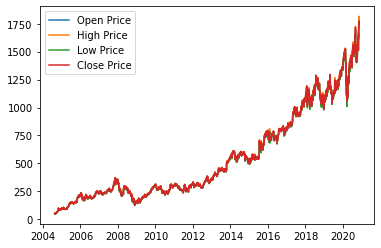

In [19]:
plt.plot(dates, open_p)
plt.plot(dates, high_p)
plt.plot(dates, low_p)
plt.plot(dates, close_p)
plt.legend(["Open Price", "High Price", "Low Price", "Close Price"])

Text(0.5, 1.0, 'Stock Price Change from 2004-08-19T00:00:00.000000000 to 2020-11-13T00:00:00.000000000 for Google')

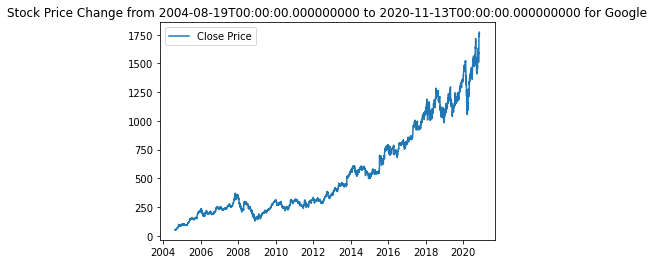

In [27]:
plt.plot(dates, close_p)
plt.legend(["Close Price"])
plt.title(f'Stock Price Change from {str(start_date)} to {str(end_date)} for {name}')